# Проект: Исследование стартапов

Написать вконце


## Цель и задачи  

**Цель:** Провести анализ данных заказчика о стартапах и ответить на поставленные вопросы.   

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - проверить достоверность данных о сотрудниках стартапа и их образовании;
    - изучить зависимость цены от категории стартапа и количества раундов финансирования перед его покупкой;
4. Сформулировать выводы по проведённому анализу.


## Данные

**Для анализа поступили следующие данные о бизнесах и их сотрудниках. Данные состоят из пяти таблиц:**

- `acquisition.csv` — Содержит информацию о покупках одними компаниями других компаний;
- `company_and_rounds.csv` —  Содержит информацию о компаниях и раундах финансирования;
- `education.csv` — Содержит информацию об образовании сотрудника;
- `people.csv` —  Содержит информацию о сотрудниках;
- `degrees.csv` — Содержит информацию о типе образования сотрудника.


### Описание таблицы `acquisition`

- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.

### Описание таблицы `company_and_rounds`

- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.

### Описание таблицы `education`

- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

### Описание таблицы `people`

- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

### Описание таблицы `degrees`

- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.

---


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка



In [8]:
#!pip install phik
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from phik import phik_matrix 
from matplotlib.ticker import ScalarFormatter

In [9]:
path = 'https://code.s3.yandex.net/datasets/'

acquisition_df = pd.read_csv(f'{path}acquisition.csv')
cnr_df = pd.read_csv(f'{path}company_and_rounds.csv')
degrees_df = pd.read_csv(f'{path}degrees.csv')
education_df = pd.read_csv(f'{path}education.csv')
people_df = pd.read_csv(f'{path}people.csv')
fund_df = pd.read_csv(f'{path}fund.csv')

In [10]:
display(acquisition_df.head()), acquisition_df.info()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


(None, None)

In [11]:
acquisition_df.isna().sum()/acquisition_df.shape[0]

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

<div class="alert alert-info " role="alert"> <b>
    
Таблица `acquisition_df` содержит 9407 строк и 6 столбцов, описание которых есть в описании данных проекта.

Столбец `term_code` имеет более 80% пропусков. В исследовании варианты расчета анализироваться не будут, поэтому пропуски оставлю. 
Менее 1% пропусков в столбце `acquired_at`. Дата сделки могла "потеряться" из-за технической ошибки.<b>

In [13]:
#Сразу приведу столбец "acquired_at" к нужному типу данных
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], infer_datetime_format=True)

/var/folders/b2/x7ybpd6s277f0mp7f_s013th0000gn/T/ipykernel_18878/2170803818.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], infer_datetime_format=True)


In [14]:
display(cnr_df.head()), cnr_df.info()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

(None, None)

In [15]:
cnr_df.isna().sum()/cnr_df.shape[0]

company  ID              0.001387
name                     0.001391
category  code           0.339288
status                   0.001387
founded  at              0.495091
closed  at               0.984162
domain                   0.324258
network  username        0.561316
country  code            0.501286
investment  rounds       0.001387
funding  rounds          0.001387
funding  total           0.001387
milestones               0.001387
funding  round  id       0.756959
company  id              0.756959
funded  at               0.758098
funding  round  type     0.756959
raised  amount           0.756959
pre  money  valuation    0.756959
participants             0.756959
is  first  round         0.756959
is  last  round          0.756959
dtype: float64

<div class="alert alert-info " role="alert"> <b>
    
Dataframe `cnr_df` содержит 217774 строк и 22 столбца, описание которых есть в описании данных проекта.

Столбцы `company  ID`, `name`, `status` и еще несколько имеют одинаковую долю пропусков - около 0,1%. Видимо данные о нескольких компаний потерялись и такие строки можно удалить, это не повлияет на результат исследования. 

Так же примерно в половине строк были потеряны дата основания компании и код страны компании.
    
98% пропусков в `closed at` говорят о том, что 98% компаний в данных - действующие.
    
Пропуски в `domain` и `network  username` могут свидетельствовать о том, что у компании сайта или социальных сетей.
    
Почти 34% пропусков в `category  code` могут означать, что компания мультикатегорийная или в списке кодов категорий нет валидного кода для компании. Не исключено, что пропуски были вызваны технической ошибкой
    
Пропуски в последних 9-ти стобцах с информацией о раундах финансирования одинаково составляют 76% и требуют анализа. Скорее всего пропуски в этих столбцах коррелируют с другими данными, или раунды финансирования были проведены не для всех компаний.<b>

In [17]:
#Удалю 0,1% строк с пропусками в company ID, name, status, investment  rounds, funding  rounds, funding  total, milestones
#И приведу столбцы с датой к оптимульному типу данных
#Приведу названия столбцов к более удобному виду

cnr_df['founded  at'] = pd.to_datetime(cnr_df['founded  at'], infer_datetime_format=True)
cnr_df['closed  at'] = pd.to_datetime(cnr_df['closed  at'], infer_datetime_format=True)
cnr_df['funded  at'] = pd.to_datetime(cnr_df['funded  at'], infer_datetime_format=True)

cnr_df = cnr_df[cnr_df['name'].notna()]

def col_to_snake_case(df):
    for col in df.columns:
        str_bad = col.lower()
        for index_s, item_s in enumerate(str_bad):
            if item_s == ' ' and str_bad[index_s + 1] == ' ':
                str_bad = str_bad[:index_s] + '_' + str_bad[index_s + 1:]
        str_bad = str_bad.replace(' ', '')
        df = df.rename(columns={col: str_bad})
    return df


cnr_df = col_to_snake_case(cnr_df)

cnr_df.info()

/var/folders/b2/x7ybpd6s277f0mp7f_s013th0000gn/T/ipykernel_18878/495580444.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cnr_df['founded  at'] = pd.to_datetime(cnr_df['founded  at'], infer_datetime_format=True)
/var/folders/b2/x7ybpd6s277f0mp7f_s013th0000gn/T/ipykernel_18878/495580444.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cnr_df['closed  at'] = pd.to_datetime(cnr_df['closed  at'], infer_datetime_format=True)
/var/folders/b2/x7ybpd6s277f0mp7f_s013th0000gn/T/ipykernel_18878/495580444.py:7: UserWarning: The argument 'infer_datetime_format'

<class 'pandas.core.frame.DataFrame'>
Index: 217471 entries, 0 to 217471
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217471 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217471 non-null  object        
 4   founded_at           109955 non-null  datetime64[ns]
 5   closed_at            3448 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217471 non-null  float64       
 10  funding_rounds       217471 non-null  float64       
 11  funding_total        217471 non-null  float64       
 12  milestones           217471 non-null  float64       
 13  funding_round_id   

In [18]:
#переименую столбцы с одинаковыми названиями 
new_columns = list(cnr_df.columns)[:14]
new_columns.append('company_id_2')
new_columns += list(cnr_df.columns)[15:]

cnr_df.columns = new_columns


In [19]:
display(degrees_df.head()), degrees_df.info()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


(None, None)

In [20]:
degrees_df.isna().sum()/degrees_df.shape[0]

id             0.000000
object_id      0.000000
degree_type    0.102372
subject        0.258298
dtype: float64

<div class="alert alert-info " role="alert"> <b>
    
Dataframe `degrees_df` содержит 109610 строк и 4 столбца, описание которых есть в описании данных проекта.

10% пропусков в `degree_type` могут означать, что у сотрудника нет научной степени, 26% пропусков в `subject` могут включать как тех, кто не имеет научной степени, так и тех, о ком не указана информация об их специальности.
<b>

In [22]:
display(education_df.head()), education_df.info()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


(None, None)

In [23]:
education_df.isna().sum()/education_df.shape[0]

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

<div class="alert alert-info " role="alert"> <b>
    
Dataframe `education_df` содержит 109610 строк и 4 столбца, описание которых есть в описании данных проекта.

Менее 0.1% пропусков в `instituition` могут быть вызваны технической ошибкой, либо говорить о том, что сотрудник не заканчивал институт. 47% пропусков в `graduated_at` могут включать в себя сотрудников, которые еще в процессе обучения и не имееют ученой степени.
<b>

In [25]:
display(people_df.head()), people_df.info()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


(None, None)

In [26]:
people_df.isna().sum()/people_df.shape[0]

id                  0.000000
first_name          0.000040
last_name           0.000018
company_id          0.847315
network_username    0.828560
dtype: float64

<div class="alert alert-info " role="alert"> <b>
    
Dataframe `people_df` содержит 226709 строк и 5 столбцов, описание которых есть в описании данных проекта.

Менее 0.1% пропусков в `first_name` могут быть вызваны технической ошибкой. 
    
83% пропусков в `network_username` могут включать в себя сотрудников, которые не захотели указывать соответсующую информацию о себе или не имеют социальных сетей.
 
85% пропусков в `company_id` скорее всего вызваны тем, что данные были неправильно подтянуты. К сожалению, большое количество пропусков в этом столбце не позволят анализировать образование сотрудников в разрезе разных стартапов или стран. 
  
<b>

 <div class="alert alert-info " role="alert"> <b>    
 В общем и целом в данных содержится много пропусков, однако это не помешает ответить на вопросы заказчика. 
 Большинство данных имеет тип Float. 
    
В ходе знакомства с данными были оптимизированы названия столбцов и данные содержащие дату приведены к типу datetime
    
    Первичное знакомтсво показывает, что данные соответсвуют своему описанию, хотя и содержат в себе много пропусков. Названия столбцов коретные, отображают содержащиеся значения.
<b>

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам


Что бы ответить на поставленные вопросы создам сводную таблицу по полю годам:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [31]:
cnr_df['year_of_funding_round'] = cnr_df['funded_at'].dt.year

pivot_rounds = pd.pivot_table(cnr_df, index = 'year_of_funding_round', 
                              values=['raised_amount'], aggfunc=['median', 'count']).reset_index()
pivot_rounds.columns=['years', 'median', 'count']
pivot_rounds = pivot_rounds[pivot_rounds['count'] > 50]

pivot_rounds

,years,median,count
15,1999.0,2000000.0,76
16,2000.0,4200000.0,125
17,2001.0,3000000.0,95
18,2002.0,4200000.0,115
19,2003.0,3000000.0,154
20,2004.0,5000000.0,286
21,2005.0,5500000.0,1624
22,2006.0,5000000.0,2409
23,2007.0,4000000.0,3220
24,2008.0,3152000.0,3735


Построю линейную диаграмму, чтобы посмотреть динамику типичного размера средств, которые получали стартапы на одном круге финансирования

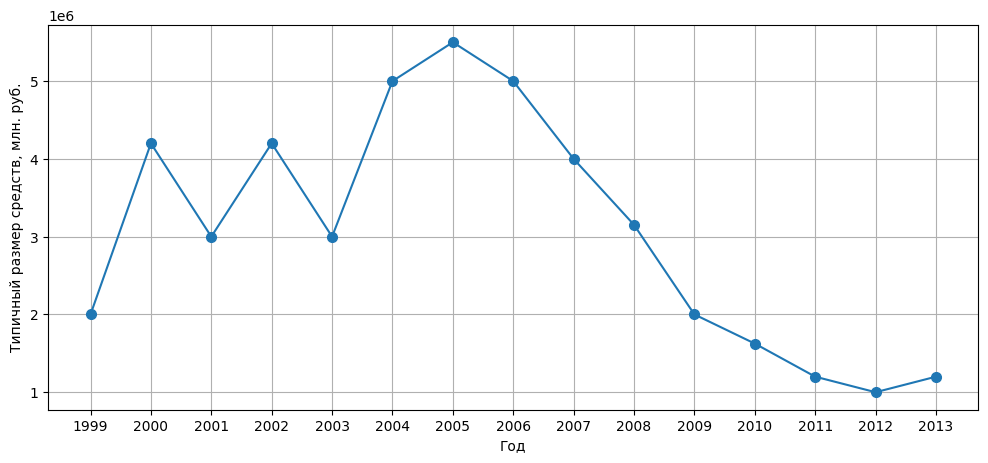

In [33]:
plt.rcParams["figure.figsize"] = (12,5)

pivot_rounds.plot(x='years', y='median', marker='o', markersize=7, legend=False, grid=True)

plt.xlabel('Год')
plt.ylabel('Типичный размер средств, млн. руб.')
plt.xticks(np.arange(1999, 2014, 1.0))

plt.show()

<div class="alert alert-info " role="alert"> <b>
    
По приведенным данным видно:
- в 2005 типичный размер финансирования на одном круге был максимальным за период с 1999 по 2013 и составлял > 5,5 млн рублей
- Однако начиная с 2005 года началась тенденция на увеличение числа раундов финансирования в целом, и с 1624 в 2005 году это число увеличелось до 11042 в 2013 году
  
<b>


### 2.2. Люди и их образование



Для начала анализа образования сотрудников, соединю два ДатаФрейма с людьми и их образованием

In [37]:
employees = people_df.merge(education_df[['person_id','instituition', 'graduated_at']], 
                            how='left', left_on='id', right_on='person_id')
#Удалю дубликаты по 'id', на случай если есть несколько записей об одном сотруднике,
#если он заканчивал несколько институтов. Мы потеряем часть информации об институтах, но сохраним число людей, об образовании которых есть информация
employees = employees.drop_duplicates(subset='id')

#Создам столбец "is_inst", который покажет, есть ли информация об институте сотрудника. Именно эту информацию будем считать за информацию об образовании
employees['is_inst'] = employees['instituition'].notna()

#Создам dataframe с компаниями и количеством сотрудников и колличеством сотрудников с информацией об институте
company_edu = employees.groupby('company_id').agg({'id':'count', 'is_inst':'sum'}).sort_values(by='id', ascending=False).reset_index()


company_edu.head(10)

,company_id,id,is_inst
0,59.0,244,168
1,29.0,150,110
2,1242.0,138,101
3,231067.0,72,58
4,499.0,63,43
5,5.0,61,45
6,494.0,56,36
7,4175.0,56,49
8,12.0,51,26
9,317.0,48,41


In [38]:
# Чтобы решить, на какие группы по числу сотрудников стоит разделить компании, посчитаю, сколько компаний имеют в штате от 1 до 10 сотрудников, так как у меня есть гипотеза, что таких компаний большинство

for i in range(1, 11):
    num_pips = company_edu[company_edu['id'] == i].count()[0]
    print(f'Всего {num_pips} компаний с числом сотудников: {i}', end='\n\n')

Всего 18116 компаний с числом сотудников: 1

Всего 2709 компаний с числом сотудников: 2

Всего 921 компаний с числом сотудников: 3

Всего 450 компаний с числом сотудников: 4

Всего 237 компаний с числом сотудников: 5

Всего 138 компаний с числом сотудников: 6

Всего 100 компаний с числом сотудников: 7

Всего 59 компаний с числом сотудников: 8

Всего 46 компаний с числом сотудников: 9

Всего 25 компаний с числом сотудников: 10



/var/folders/b2/x7ybpd6s277f0mp7f_s013th0000gn/T/ipykernel_18878/644720835.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_pips = company_edu[company_edu['id'] == i].count()[0]
/var/folders/b2/x7ybpd6s277f0mp7f_s013th0000gn/T/ipykernel_18878/644720835.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_pips = company_edu[company_edu['id'] == i].count()[0]
/var/folders/b2/x7ybpd6s277f0mp7f_s013th0000gn/T/ipykernel_18878/644720835.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beh

Мы видим, что абсолютное большинство стартапов состоит из 1 сотрудника - 18116. Предлагаю такие компании выделить в отдельную категорию. Числа компаний с 2 и 3 сотрудниками так же имею большой развыв от других компании и состоавляют 2709 и 921 соответсвенно. По первым строкам таблицы мы видим, что компании с числом сотрудников > 100 скорее исключение и встречаются крайне редко, поэтому выделим в категории компании с числом сотрудников > 10. И остается последняя категория - от 4 до 10 сотрудников.

In [40]:
#Напишу функцию для категоризации данных

def categorize_company(row):
    if row['id'] > 10:
        return '> 10'
    elif row['id'] > 3:
        return '> 3'
    elif row['id'] > 1:
        return '2 or 3'
    else:
        return '1 employee'
    
company_edu['cat_of_com'] = company_edu.apply(categorize_company, axis=1)

#Сделаю сводник для подсчета долей пропусков в информации об образовании по категориям компаний

for_bar_com_edu = company_edu.groupby('cat_of_com').agg({'id':'sum', 'is_inst':'sum'})
for_bar_com_edu['share_is_inst'] = for_bar_com_edu['is_inst'] / for_bar_com_edu['id']

for_bar_com_edu

,id,is_inst,share_is_inst
cat_of_com,,,
1 employee,18116,9726,0.536873
2 or 3,8181,4303,0.525975
> 10,2668,1678,0.628936
> 3,5649,2735,0.484156


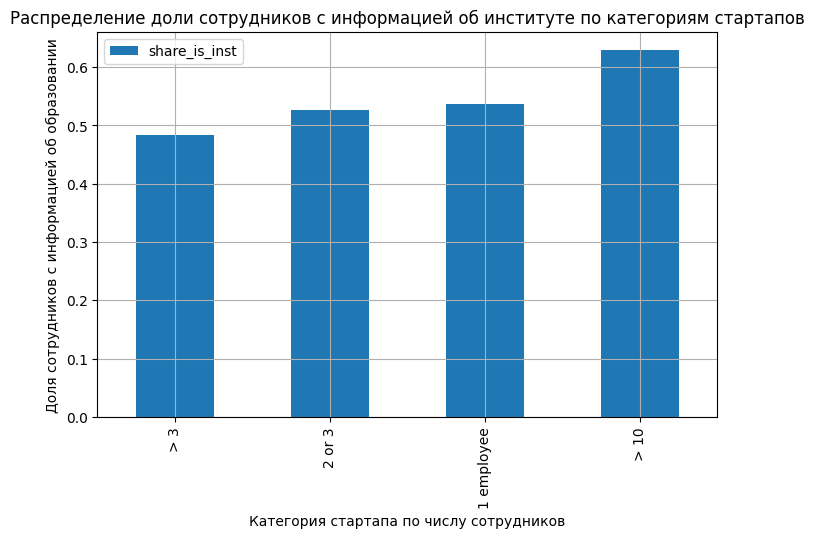

In [41]:
plt.rcParams["figure.figsize"] = (8,5)

for_bar_com_edu[['share_is_inst']].sort_values(by='share_is_inst').plot(kind='bar', grid=True)

plt.xlabel('Категория стартапа по числу сотрудников')
plt.ylabel('Доля сотрудников с информацией об образовании')
plt.title('Распределение доли сотрудников с информацией об институте по категориям стартапов')

plt.show()

<div class="alert alert-info " role="alert"> <b>
    
По получившейся диаграмме можно сделать следующие выводы:
- Меньше всего шансов найти в данных информацию об образовании сотрудника в стартапах с числом сотрудников от 4 до 10: < 50%
- Для стартапов с числом сотрудников 1, или 2 или 3 включительно эта доля составляет чуть больше 50%
- При анализе компаний с числом сотрудников более 10 эта доля вырастает до 60% и выше                                                                                                                            
    
Далее проверю возможность джоина датафрейма с информацией об образовательной степени сотрудника
<b>

In [43]:
degrees_df['object_id'].nunique()

68451

In [44]:
education_df['person_id'].nunique()

68451

Наличие одинакового количества уникальных записей в датафреймах выглядит так, как будто информация имеется об одних и тех же сотрудников. Cначала приведу идентификатор сотрудника в датафрейме degrees_df к нужному типу

In [46]:
degrees_df['object_id'] = degrees_df['object_id'].apply(lambda x: x[2:])
degrees_df

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"
...,...,...,...,...
109605,109606,268589,CPA,NaN
109606,109607,268527,MS & BS,Engineering
109607,109608,268527,PhD,Engineering
109608,109609,268528,B.S.,Electrical Engineering


<div class="alert alert-info " role="alert"> <b>
Из-за того, что в данных как об институте, так и о степени примерно 40000 дубликатов, которые говорят о том, что сотрудник мог заканчивать разые институтуты и получить несколько степеней, корректно сджойнить эти датафреймы не получится. Чтобы это было возможндо сделать, надо джоинить по нескольким ключам, однако у нас ключ один - id сотрудника. 

Чтобы не дублировать сроки, могу предложить хранить информацию об институтах одного сотрудника и о его степенях в виде списка, тогда строк будет столько же, сколько и сотрудников. Для дальнейшего исследования это нам не пригодится. Поэтому данный абзац носит рекомендательный характер.
<b>

### 2.3. Объединять или не объединять — вот в чём вопрос

Для того, чтобы проанализировать значения в "network_username" создам отдельные три датафрейма с значением этих колонок, попробую сджоинить их и посчитаю, сколько получилось сджоинить и сколько пропусков

In [49]:
username_from_people = people_df[people_df['network_username'].notna()]['network_username'].copy().reset_index()
username_from_people = username_from_people.rename(columns={'index':'index_people','network_username':'network_username_people'})
username_from_people = username_from_people.drop_duplicates(subset='network_username_people')

username_from_fund = fund_df[fund_df['network_username'].notna()]['network_username'].copy().reset_index()
username_from_fund = username_from_fund.rename(columns={'index':'index_fund','network_username':'network_username_fund'})
username_from_fund = username_from_fund.drop_duplicates(subset='network_username_fund')

username_from_cnr = cnr_df[cnr_df['network_username'].notna()]['network_username'].copy().reset_index()
username_from_cnr = username_from_cnr.rename(columns={'index':'index_cnr','network_username':'network_username_cnr'})
username_from_cnr = username_from_cnr.drop_duplicates(subset='network_username_cnr')

In [50]:
# Проверю, на сколько network_username из cnr_df подходит для джоина people_df
username_cnr_people = username_from_people.merge(username_from_cnr, 
                      how='outer', left_on='network_username_people', right_on='network_username_cnr')
# выведу число строк, которое получилось сдоинить
print('Число совпадений по username в датафреймах cnr_df и people_df:')
print(username_cnr_people[(username_cnr_people['network_username_people'].notna()) 
                    & (username_cnr_people['network_username_cnr'].notna())].shape[0])
print(f'''При том в cnr_df у нас есть информация о {username_from_cnr.shape[0]} никах,
а в people_df - о {username_from_people.shape[0]} никах''')


Число совпадений по username в датафреймах cnr_df и people_df:
2199
При том в cnr_df у нас есть информация о 79571 никах,
а в people_df - о 38421 никах


Как видно, совпадений совсем немного, поэтому network_username не подходит для объединения данных датафреймов. В целом это и логично, так как people_df содержит информацию о людях, а cnr_df о компаниях

In [52]:
# Проверю, на сколько network_username из cnr_df подходит для джоина fund_df
username_cnr_fund = username_from_cnr.merge(username_from_fund, 
                      how='outer', left_on='network_username_cnr', right_on='network_username_fund')
# выведу число строк, которое получилось сдоинить
print('Число совпадений по username в датафреймах cnr_df и fund_df:')
print(username_cnr_fund[(username_cnr_fund['network_username_cnr'].notna()) 
                    & (username_cnr_fund['network_username_fund'].notna())].shape[0])
print(f'''При том в cnr_df у нас есть информация о {username_from_cnr.shape[0]} никах,
а в fund_df - о {username_from_fund.shape[0]} никах''')

Число совпадений по username в датафреймах cnr_df и fund_df:
70
При том в cnr_df у нас есть информация о 79571 никах,
а в fund_df - о 2098 никах


Как видно, совпадений совсем немного, поэтому network_username не подходит для объединения данных датафреймов. В целом это и логично, так как fund_df содержит информацию о фондах, а cnr_df о компаниях

<div class="alert alert-info " role="alert"> <b>
    
'network_username' столбец хоть и называется одинаково в разных Датафреймах, но содержит разную информацию и не подходит для соединения таблиц
<b>


### 2.4. Проблемный датасет и причина возникновения пропусков

Для начала анализа проблемного датасета определю, совпадают ли значения в company_id_2 и company_id

In [56]:
print('Сколько значений в company_id_2 совпадают со значениями в company_id:')
cnr_df[cnr_df['company_id'] == cnr_df['company_id_2']].shape[0]

Сколько значений в company_id_2 совпадают со значениями в company_id:


52626

In [57]:
print('Сколько значений в company_id_2 без пропусков:')
cnr_df['company_id_2'].notna().sum()

Сколько значений в company_id_2 без пропусков:


np.int64(52626)

Все не пропущенные значения в company_id_2 совпадают со значениями в company_id. Скорее всего так произошло, потому что изначально это было два разных датафрейма - в первом хванилась информация о компании, а во втором хранилась информация о кругах финансирования компаний. Большое количество пропусков в информации о кругах финансирования говорит о том, что финансировались не все компании из списка всех стартапов в первом датасете

<div class="alert alert-info " role="alert"> <b>
Для анализа кругов финансирования в дальнейшем нам не нужны данные о всех существущих стартапов за период, которые не проводили круги финансирования.

предлагаю создать новый датафрейм, в котором будет информация только о компаниях и о кругах финансирования компаний, которые финансировались
    <b>

In [60]:
#Оптимизирую тип данных
for col in list(cnr_df.columns):
    if cnr_df[col].dtype == '<M8[ns]':
        pass
    else:
        cnr_df[col] = pd.to_numeric(cnr_df[col], errors='ignore', downcast='integer')
    

/var/folders/b2/x7ybpd6s277f0mp7f_s013th0000gn/T/ipykernel_18878/743026137.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  cnr_df[col] = pd.to_numeric(cnr_df[col], errors='ignore', downcast='integer')
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


In [61]:
cnr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217471 entries, 0 to 217471
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   company_id             217471 non-null  int32         
 1   name                   217471 non-null  object        
 2   category_code          143886 non-null  object        
 3   status                 217471 non-null  object        
 4   founded_at             109955 non-null  datetime64[ns]
 5   closed_at              3448 non-null    datetime64[ns]
 6   domain                 147159 non-null  object        
 7   network_username       95534 non-null   object        
 8   country_code           108607 non-null  object        
 9   investment_rounds      217471 non-null  int16         
 10  funding_rounds         217471 non-null  int8          
 11  funding_total          217471 non-null  int64         
 12  milestones             217471 non-null  int8     

В получившимся датафрейме теперь храниться информация и о кругах финансирования и о компаниях, которые финансировались. 
Для оптимизации дальнейшего исследования и вычислений предлагаю разделить данный датафрейм на два: первый - о компаниях, второй - с более детальной информацией о кругах финансирования

In [63]:
# Проверю, правильно ли посчитал столбец "funding_total". Если он посчитал правильно, 
#то сумма по этому столбцу "raised_amount" должна совпадать с суммой столбца "funding_total" при отборе уникальных компаний
cnr_df['raised_amount'].sum() - cnr_df.drop_duplicates(subset='company_id')['funding_total'].sum()


np.float64(737.0)

Суммы почти совпадают. Разница в 737 денежных единиц незначильна и может быть вызвана технической ошибкой при подгрузке данных или человеческим фактором при расчетах. Считаю, что "funding_total" посчитан правильно.

Тем же способом проверю столбец "funding_rounds"

In [65]:
cnr_df['funding_round_id'].count() - cnr_df.drop_duplicates(subset='company_id')['funding_rounds'].sum()


np.int64(0)

Отлично, стобец "funding_rounds" посчитан правильно и нам не нужно писать оконную функцию для подсчета кругов финансирования для каждой коомпании

In [67]:
companies_df = cnr_df.iloc[:, :13].drop_duplicates()
funding_rounds_df = cnr_df.iloc[:, 13:]

<div class="alert alert-info " role="alert"> <b>
Теперь у нас есть два Датафрейма:
    
    
- companies_df с информацией об уникальных компаниях, которые учавствовали в кругах финансирования
- funding_rounds_df с информацией о кругах финансирования этих компаний
    <b>

#### Вывод

<div class="alert alert-info " role="alert"> <b>
Во втором шаге данного проекта, были определены:
    
- тенденции изменения числа кругов финансирования и средней суммы финансирования по годам: в 2005 году средняя сумма финансирования была максимальной за период и составила 5.5 млн. ден. ед., однако число кругов финансирования увеличивается из года в год и к 2013 году составляла 11042.
- В компаниях с числом сотрудников > 10 больше шанс найти информацию об образовании сотрудника (60+%).
- Столбец "network_username" в разных датафреймах принимает разные значения и не подходит в роли ключа для джоина
- рекомендация хранить информацию об образовании 1 сотрудника в 1 строке используя списки в роли значений
- Анализ данных company_and_rounds.csv. Проведена отчистка датафрейма от компаний без информации о кругах финансирования и разделение датафрейма на 2: companies_df и funding_rounds_df
    <b>



## Шаг 3. Исследовательский анализ объединённых таблиц




### 3.1. Объединение данных

Для того, чтобы анализировать только те компании, которые меняли или готовы менять владельцев, которые и интересуют заказчика, отфильтрую создам датафрейм (на основе фрейма companies_df), в котором будут компании с числом investment_rounds и funding_rounds > 0 и status = "acquired"

In [72]:
companies_filtered = companies_df[((companies_df['investment_rounds'] > 0) 
                                       | (companies_df['funding_rounds'] > 0)
                                       | (companies_df['status'] == 'acquired'))]



In [73]:
companies_filtered.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0,4
15,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000,3
20,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0,4



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оценю, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.


In [75]:
pd.options.display.float_format = '{:.1f}'.format 

In [76]:
companies_filtered['funding_total'].describe()

count        40747.0
mean      10135609.6
std       56464360.0
min              0.0
25%              0.0
50%         600000.0
75%        5650650.0
max     5700000000.0
Name: funding_total, dtype: float64

Стандартное отклонение в 10 раз больше медианного, что говорит о том, что разброс данных очень большой. Как видно Максимальное значение в почти 6 млд явно отклоняет среднее значение 'funding_total' от медианы. а Q1 равный 0 может свидетельствовать о том, что много компаний не финансировались или имеют "0" в поле 'funding_total'

In [78]:
#Проверю, как много компаний "финансированись" на 0 или значения близкие нулю

for i in range(6):
    print(f'компаний со значением "{i}" в "funding_total": {companies_filtered[companies_filtered["funding_total"]==i]["funding_total"].count()}')

компаний со значением "0" в "funding_total": 12873
компаний со значением "1" в "funding_total": 0
компаний со значением "2" в "funding_total": 0
компаний со значением "3" в "funding_total": 0
компаний со значением "4" в "funding_total": 0
компаний со значением "5" в "funding_total": 0


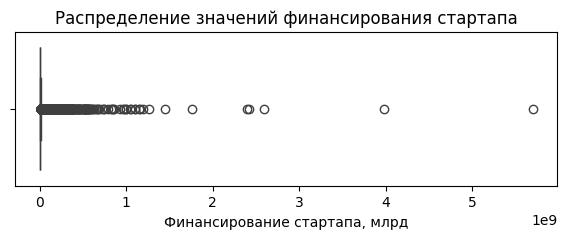

In [79]:
plt.figure(figsize=(7, 2))

sns.boxplot(x=companies_filtered['funding_total'])

plt.title('Распределение значений финансирования стартапа')
plt.xlabel('Финансирование стартапа, млрд')


plt.show()

Данный график подтверждаее ранее сказанное - большинство значений находятся в диапазоне менее полумиллиарда денежных единиц, однако в наших данных имеется много ярко выраженных выбросов. К данным в том виде, в котором они у нас есть, невозможно применить классические методы определения типичных значений. Требуется определеить границы выбросов и проанализировать большое колличество компаний с 0 в 'funding_total'

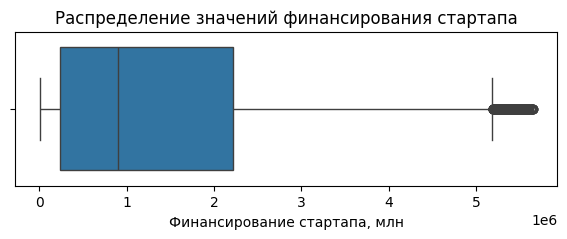

In [81]:
Q3= companies_filtered['funding_total'].quantile(q=0.75)
Q1= companies_filtered['funding_total'].quantile(q=0.25)

plt.figure(figsize=(7, 2))

sns.boxplot(x=companies_filtered[(companies_filtered['funding_total'] < Q3) 
                                &(companies_filtered['funding_total'] > Q1)]['funding_total'])

plt.title('Распределение значений финансирования стартапа')
plt.xlabel('Финансирование стартапа, млн')


plt.show()

Если отсеять половину значений - самые маленькие и самые большие и посмотреть на значения в рамках межквартильного интервала, то видно, что наиболее часто компании финансировались на сумму примерно 900 тысяч. Однако стоит учитывать, что мы отсеяли половину значений.

<div class="alert alert-info " role="alert"> <b>
    Аналитически рассчитаю верхнюю и нижнюю границу выбросов для столбца funding_total и укажу, каким процентилям границы соответствуют. Так как разброс большой, использую логарифмическое преобразование
   <b> 

In [84]:
companies_filtered['log_funding_total'] = np.log(companies_filtered['funding_total'] + 1)

Q3_log = companies_filtered['log_funding_total'].quantile(q=0.75)
Q1_log = companies_filtered['log_funding_total'].quantile(q=0.25)

IQR_log = Q3 - Q1

#Так как разброс данных очень большой, буду использовать более высокий коэффицент IQR - 2 вместо 1.5

lower_bound = Q1_log - 2 * IQR_log
upper_bound = Q3_log + 2 * IQR_log

print(f'Нижняя граница выбросов: {round(lower_bound)}')
print(f'Верхняя граница выбросов: {round(upper_bound)}')

Нижняя граница выбросов: -11301300
Верхняя граница выбросов: 11301316


/var/folders/b2/x7ybpd6s277f0mp7f_s013th0000gn/T/ipykernel_18878/3939858494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies_filtered['log_funding_total'] = np.log(companies_filtered['funding_total'] + 1)


Даже после логарифмичекого преобразования мы получили большую разницу между Q1 и Q2, что говорит об очень широком диапозоне значений, большом числе выбросов. 

Все данные положительные и нижнюю границу мы не можем оставить отрицательной. Примем 1 за нижнюю границу, так как 12к компаний имеют 0 в значении "funding_total"

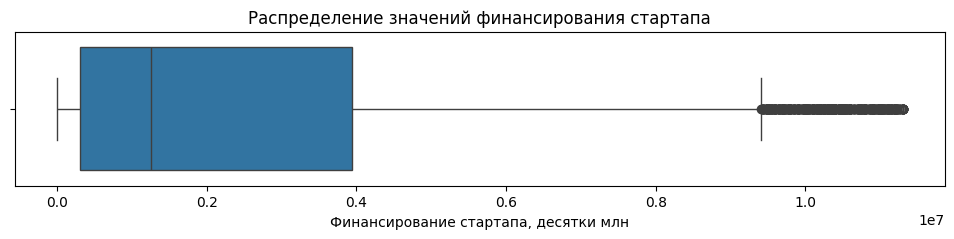

In [86]:
plt.figure(figsize=(12, 2))

sns.boxplot(x=companies_filtered[(companies_filtered['funding_total'] < upper_bound) 
                                &(companies_filtered['funding_total'] > 1)]['funding_total'])


plt.title('Распределение значений финансирования стартапа')
plt.xlabel('Финансирование стартапа, десятки млн')


plt.show()

После логарифмического преобразования и определения верхней и нижней границы получаем график, на котором отсеяли выбросы, и на котором видно, что медиана составляет примерно 1,3 млн. 
Определю перцентили новых границ выбросов

In [88]:
print("перцентиль нижней границы выбросов:")

print(round(companies_filtered[companies_filtered['funding_total'] < 1]['funding_total'].count()/companies_filtered['funding_total'].count() * 100))

print("перцентиль верхней границы выбросов:")

print(round(companies_filtered[companies_filtered['funding_total'] < 11301316]['funding_total'].count()/companies_filtered['funding_total'].count() * 100))


перцентиль нижней границы выбросов:
32
перцентиль верхней границы выбросов:
83


<div class="alert alert-info " role="alert"> <b>
Высокий перцентиль нижней границы обоснован большим числом компаний с нулевым "funding_total". Таким образом при отсеивании 17% аномально высоких значений и большого числа нулевых значений, мы получаем типичный объем финансирования - 1,3 млн <b>

### 3.3. Куплены забесплатно?

<div class="alert alert-info " role="alert"> <b>
Исследую компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования. Использую ДатаФрейм "acquisition"
    <b>

In [92]:
# присоединю информацию о продажах компании и оставлю только те компании, которые продавались

acquisitions = pd.merge(acquisition_df, companies_filtered, 
        how='left', 
        left_on='acquired_company_id',
        right_on='company_id')

#выберу компании, у которых был ненулевой общий объём финансирования.

acquisitions_filtered = acquisitions[(acquisitions['funding_total'] > 0) & 
                                     ((acquisitions['price_amount'] == 0) |
                                      (acquisitions['price_amount'] == 1))]

acquisitions_filtered.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,log_funding_total
7,14,318,314,cash,0,2006-10-01,314.0,Reddit,web,acquired,2005-01-01,NaT,reddit.com,reddit,USA,0.0,1.0,100000.0,3.0,11.5
49,65,146,698,cash,0,2007-08-01,698.0,Maya's Mom,web,acquired,NaT,NaT,mayasmom.com,NaN,USA,0.0,1.0,1000000.0,2.0,13.8
51,67,156,718,cash,0,2007-08-01,718.0,Glimpse,ecommerce,acquired,NaT,NaT,glimpse.com,NaN,USA,0.0,1.0,4000000.0,0.0,15.2
65,87,1035,175,cash,0,2007-10-01,175.0,Newsvine,web,acquired,2005-03-31,NaT,newsvine.com,NaN,USA,0.0,1.0,1250000.0,0.0,14.0
85,115,396,1582,cash,0,2007-12-01,1582.0,BeliefNet,web,acquired,2008-01-01,NaT,beliefnet.com,eliefnet,USA,0.0,1.0,7000000.0,3.0,15.8


Сразу же бросается в глаза Reddit, у которого price amount = 0, хотя нам известно, что данный стартап был продан за 10 млн долларов в 2006 году компанией "Condé Nast" [https://rb.ru/story/reddit-internet-frontpage/] или компаний Yedda, которая была продана в 2007, однако условия сделки все еще не раскрыты.

Можно сделать вывод, что компании, которые "проданы за 1 или 0", просто не раскрывали условия своих сделок, или условия не были известны на момент собирания данной базы, которую просто неактулизировали. Так или иначе, это не значит, что такие компании были отданы даром.

Далее проанализирую "funding_total" у таких компаний.

In [94]:
acquisitions_filtered['funding_total'].describe()

count         1618.0
mean      18152961.9
std      144503027.5
min           3750.0
25%        2000000.0
50%        6000000.0
75%       15500000.0
max     5700000000.0
Name: funding_total, dtype: float64

Стандартное отклонение намного больше медианного, что снова говорит о том, что разброс данных очень большой. Как видно Максимальное значение в почти 6 млд явно отклоняет среднее значение 'funding_total' от медианы.

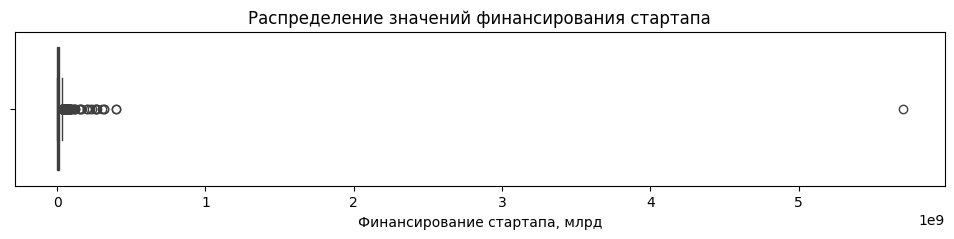

In [96]:
plt.figure(figsize=(12, 2))

sns.boxplot(x=acquisitions_filtered['funding_total'])

plt.title('Распределение значений финансирования стартапа')
plt.xlabel('Финансирование стартапа, млрд')


plt.show()

Максимальный выброс, значение которого больше 5-ти миллиардов, сильно растягивает диаграмму. предлагаю его отсеять для большей наглядности

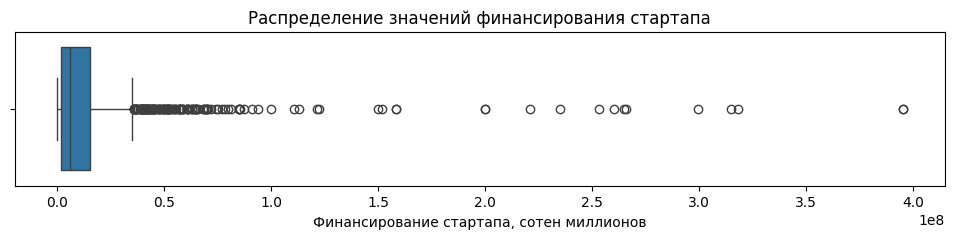

In [98]:
plt.figure(figsize=(12, 2))

sns.boxplot(x=acquisitions_filtered[acquisitions_filtered['funding_total'] < 5000000000]['funding_total'])

plt.title('Распределение значений финансирования стартапа')
plt.xlabel('Финансирование стартапа, сотен миллионов')


plt.show()

Полученный "Ящик с усами" более наглядный. Видно, что большинество значений распределены примерно до 100 миллионов. Предлагаю снова посмотреть на график, а котором отсеяны большие значения 

In [100]:
# Посчитаю, какую долю значений занимают значения до 100 млн

round(acquisitions_filtered[acquisitions_filtered['funding_total'] > 100000000]['funding_total'].count() / acquisitions_filtered['funding_total'].count(), 2)

np.float64(0.01)

Могу их отсеять, не боясь за искажение данных

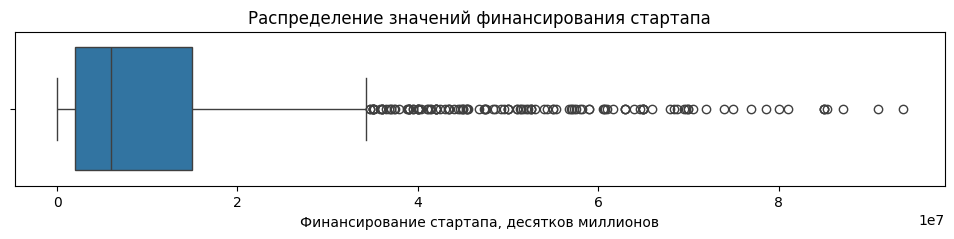

In [102]:
plt.figure(figsize=(12, 2))

sns.boxplot(x=acquisitions_filtered[acquisitions_filtered['funding_total'] < 100000000]['funding_total'])

plt.title('Распределение значений финансирования стартапа')
plt.xlabel('Финансирование стартапа, десятков миллионов')


plt.show()

На данном графике уже разборчиво видно, что 75% значений лежит в диапазоне до 18 млн, а выбросы определены значениями больше 37 миллионов. Предлагаю определить данное значение, как верхнюю границу выбросов. Проверю, каким персентилем она обозначается

In [104]:
print("перцентиль нижней границы выбросов:")

print(round(acquisitions_filtered[acquisitions_filtered['funding_total'] < 3751]['funding_total'].count()/acquisitions_filtered['funding_total'].count() * 100))

print("перцентиль верхней границы выбросов:")

print(round(acquisitions_filtered[acquisitions_filtered['funding_total'] < 37000000]['funding_total'].count()/acquisitions_filtered['funding_total'].count() * 100))


перцентиль нижней границы выбросов:
0
перцентиль верхней границы выбросов:
91


<div class="alert alert-info " role="alert"> <b>
При анализе компании, которые были проданы за 1 или 0 рублей были определены следующие границы выбросов - 3751 и 37 млн, что соответсвует 0 и 91 персентилю. Медианное значение финансирования таких компании соответсвует 8,5 млн. Рекомендуется разделить компании на сегменты по сумме финансирования и провести отдельную аналитику для сегментов
    <b>


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [107]:

# Определю топ категорий с наибольшим разбросом цен, сравнивать буду именно std, так как std и говорит нам о разбросе значений
print('Топ категорий с наибольшим разбросом цен за стратап:')
print()
print(
acquisitions.groupby('category_code')['price_amount'].std().sort_values(ascending=False).head(10)
)   
# Определю топ категорий с наибольшими типичными ценами для категории, сравнивать буду медиану

print()
print('Топ категорий с наибольшими ценами за стратап:')
print(
acquisitions.groupby('category_code')['price_amount'].median().sort_values(ascending=False).head(10)
)
# Определю топ категорий по стоимости дорогих компании, сравнивать буду 90й перцентиль. 
# он покажет, от какой стоимости начинаются 10% самых дорогих компаний в категории

print()
print('Топ категорий по стоимости дорогих компании:')
print(
acquisitions.groupby('category_code')['price_amount'].quantile(q=0.90).sort_values(ascending=False).head(10)
)

Топ категорий с наибольшим разбросом цен за стратап:

category_code
enterprise         128088235060.2
public_relations     4059244205.0
real_estate          2505122913.1
automotive           2297757559.0
biotech              1540373521.4
health               1249084287.1
other                1085128941.4
manufacturing         969657968.0
finance               796098475.8
semiconductor         790488902.8
Name: price_amount, dtype: float64

Топ категорий с наибольшими ценами за стратап:
category_code
nanotech        584000000.0
manufacturing    72000000.0
real_estate      50000000.0
automotive       43000000.0
biotech          13200000.0
hospitality      12500000.0
finance            600000.0
news                    0.0
nonprofit               0.0
other                   0.0
Name: price_amount, dtype: float64

Топ категорий по стоимости дорогих компании:
category_code
automotive       4080000000.0
real_estate      3400000000.0
manufacturing    1760000000.0
sports            695000000.0


Выводы по выведенным данным:
* enterprise, public_relations, real_estate, automotive, biotech, health, other - категории с наибольшим разбросом цен за стартап (std > 1 млрд)   
* nanotech, manufacturing, real_estate, automotive, biotech, hospitality, finance - категории, в которых типичная цена стартапа выше остальных категорий
* automotive, real_estate, manufacturing - категории, в которых дорогие стартапы относительно своей категории дороже остальных. В этих категориях самая дешевая компания среди 10% самых дорогих была продана более чем за 1 мдлр

In [109]:
# Теперь визуализации
top_std = acquisitions.groupby('category_code')['price_amount'].std().sort_values(ascending=False).head(7)
top_median = acquisitions.groupby('category_code')['price_amount'].median().sort_values(ascending=False).head(7)
top_expensive = acquisitions.groupby('category_code')['price_amount'].quantile(q=0.90).sort_values(ascending=False).head(15)


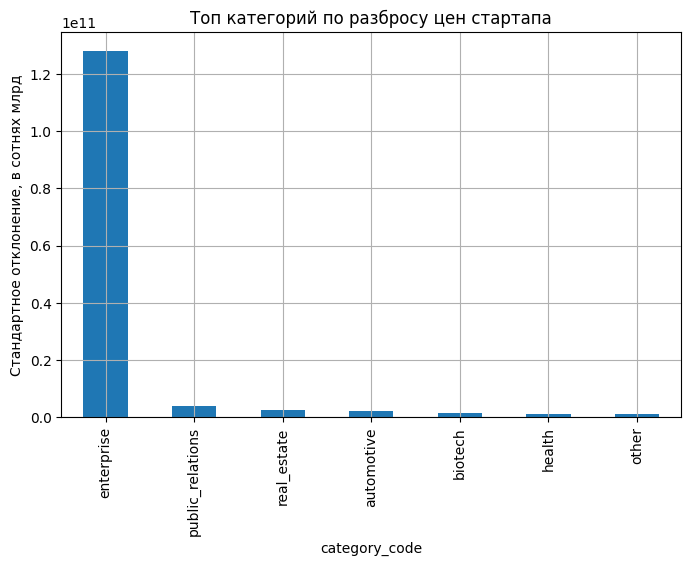

In [110]:
plt.rcParams["figure.figsize"] = (8,5)

top_std.plot(kind='bar', grid = True)

plt.title('Топ категорий по разбросу цен стартапа')
plt.ylabel('Стандартное отклонение, в сотнях млрд')

plt.show()

Так как категория enterprise сильно выделяется, выведу топ без этой категории

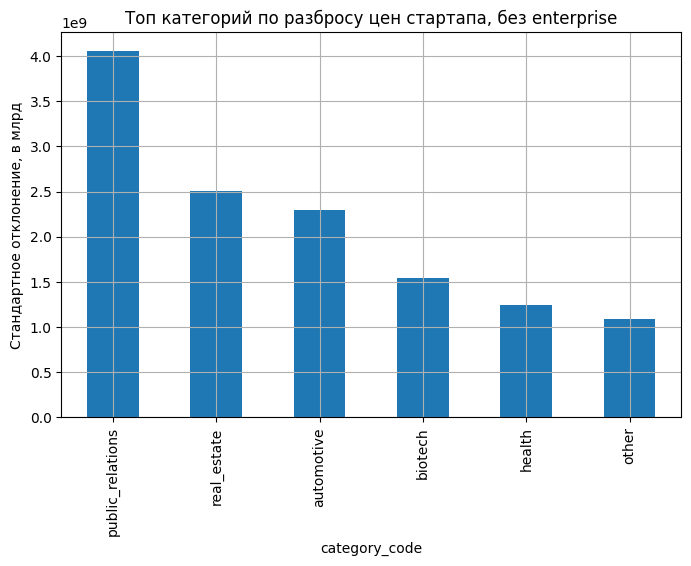

In [112]:
plt.rcParams["figure.figsize"] = (8,5)

top_std.loc[['public_relations', 
             'real_estate', 
             'automotive',
             'biotech',
             'health',
             'other']].plot(kind='bar', grid = True)

plt.title('Топ категорий по разбросу цен стартапа, без enterprise')
plt.ylabel('Стандартное отклонение, в млрд')

plt.show()

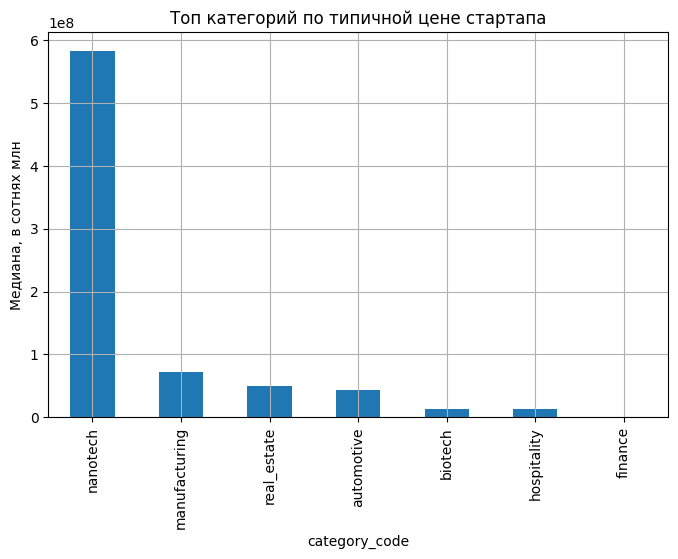

In [113]:
plt.rcParams["figure.figsize"] = (8,5)

top_median.plot(kind='bar', grid = True)

plt.title('Топ категорий по типичной цене стартапа')
plt.ylabel('Медиана, в сотнях млн')

plt.show()

Так как категория nanotech сильно выделяется, выведу топ без этой категории

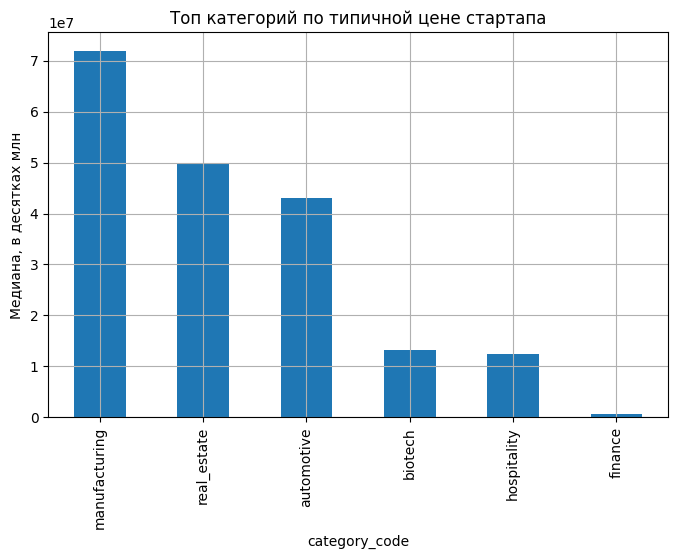

In [115]:
plt.rcParams["figure.figsize"] = (8,5)

top_median.loc[['manufacturing',
                'real_estate',
                'automotive',
                'biotech',
                'hospitality',
                'finance']].plot(kind='bar', grid = True)

plt.title('Топ категорий по типичной цене стартапа')
plt.ylabel('Медиана, в десятках млн')

plt.show()

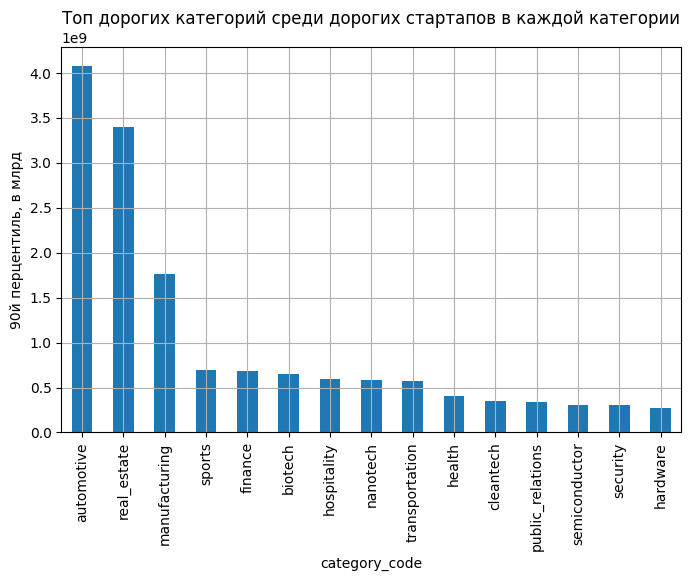

In [116]:
plt.rcParams["figure.figsize"] = (8,5)

top_expensive.plot(kind='bar', grid = True)

plt.title('Топ дорогих категорий среди дорогих стартапов в каждой категории')
plt.ylabel('90й перцентиль, в млрд')

plt.show()

<div class="alert alert-info " role="alert"> <b>
Подводя итоги можно выделить:
    
    
- категорию enterprise с самым большим разбросом цен - более 100 млрд, при том, что в остальных категориях это значение не выше 5 млрд
- категорию nanotech с типичной ценой продажи стартапа почти 600 млн, в то время, как в остальных категориях это значение не выше 100 млн
- категории automotive, real_estate, manufacturing, как категории в которых дорогие стартапы наиболее дорогие
    <b>


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [119]:
#Использую companies_filtered, в котором информация о всех уникальных компаниях
companies_filtered.groupby('status')['funding_rounds'].mean().sort_values(ascending=False)

status
ipo         1.9
operating   1.5
closed      1.4
acquired    0.5
Name: funding_rounds, dtype: float64

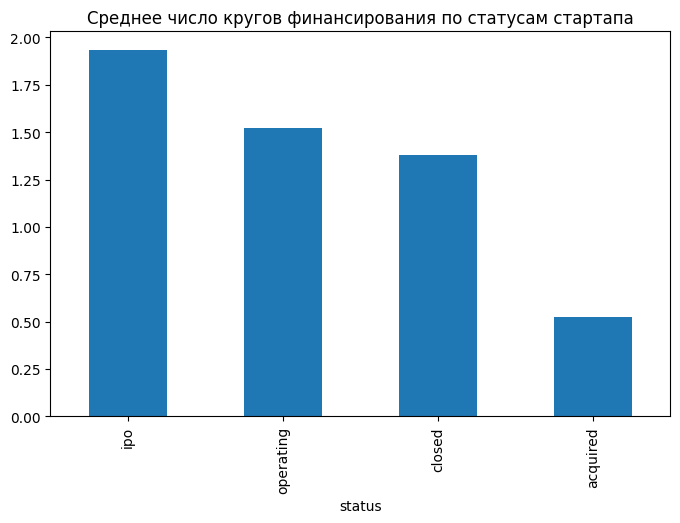

In [120]:
plt.rcParams["figure.figsize"] = (8,5)

companies_filtered.groupby('status')['funding_rounds'].mean().sort_values(ascending=False).plot(kind='bar')

plt.title('Среднее число кругов финансирования по статусам стартапа')

plt.show()

<div class="alert alert-info " role="alert"> <b>
Самое большое число кругов финансирования имеют стартапы со статусом ipo
    <b>


## Шаг 4. Итоговый вывод и рекомендации

### Выводы по итогам проделанной работы:
* В данных содержится много пропусков, однако это не помешало ответить на вопросы заказчика. 
* В ходе знакомства с данными были оптимизированы названия столбцов и тип данных 
- Тенденции изменения числа кругов финансирования и средней суммы финансирования по годам: в 2005 году средняя сумма финансирования была максимальной за период и составила 5.5 млн. ден. ед., однако число кругов финансирования увеличивается из года в год и к 2013 году составляла 11042.
- В компаниях с числом сотрудников > 10 больше шанс найти информацию об образовании сотрудника (60+%).
- Столбец "network_username" в разных датафреймах принимает разные значения и не подходит в роли ключа для джоина
- Рекомендация хранить информацию об образовании 1 сотрудника в 1 строке используя списки в роли значений
- Проведена отчистка датафрейма company_and_rounds.csv от компаний без информации о кругах финансирования и разделение датафрейма на 2: companies_df и funding_rounds_df
- 1618 компаний, которые финансировались, были проданы за 1 и 0, однако определенно недостаточными сведениями о каждой такой сделке
- При анализе компании, которые были проданы за 1 или 0 рублей были определены следующие границы выбросов - 3751 и 37 млн, что соответсвует 0 и 91 персентилю. Медианное значение финансирования таких компании соответсвует 8,5 млн.
- Для анализа финансировалия всех компаний рекомендуется разделить компании на сегменты по funding_total и анализировать каждый сегмент отдельно
- Самое большое число кругов финансирования имеют стартапы со статусом ipo


При анализе категорий стартапов можно выделить следующие категории:

- категорию enterprise с самым большим разбросом цен - более 100 млрд, при том, что в остальных категориях это значение не выше 5 млрд
- категорию nanotech с типичной ценой продажи стартапа почти 600 млн, в то время, как в остальных категориях это значение не выше 100 млн
- категории automotive, real_estate, manufacturing, как категории в которых дорогие стартапы наиболее дорогие
